In [5]:
import random
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

---

#### Basic probability

Probability is about counting

* enumerate all the possibilities N

* count the ways an event occurs, call it n

* calculate probability = n/N  (_frequentist_ definition)

---

### Some Basic Facts About Probability 

Probabilities are always in the range $0$ to $1$. $0$ if impossible, and $1$ if guaranteed.

* probability is a fraction: numerator/denominator
    
* the denominator is all possible events or sample space. The numerator is the subset of that that's of interest or event.
    
* the sum of the probabilities of all events must equal $1$, i.e. $\sum_i p_i = 1 $
    



2) If the probability of an event occurring is $p$, the probability of it not occurring must be $1-p$



3) When events are **independent** of each other, the probability of all of the events occurring is equal to a product of the probabilities of each of the events occurring. 

So if events $A$ and $B$ are independent and if the probability of $A$ is, say, $0.5$ and the probability of $B$ is, say,  $0.3$, then the probability of $A$ *and* $B$ is $0.15$ (smaller than either of the other two) - **multiplicative law**.

#### Example: rolling a die

Suppose you roll a die several times. What is the probablity that you get 11111 (five ones) in a row? Note that this is a pretty rare event!

The probability of rolling a $1$ is:

P(1) = $(\frac{1}{6})$

If you roll 5 times, all events are independent, then:

P(11111) = $(\frac{1}{6})^5$

In [6]:
1/6**5

0.0001286008230452675

---

#### A simple stochastic model: Simulating the rolling of a die

In [7]:
# Using choice()
def roll_die():
    return random.choice(range(1,7)) # choose numbers from [1,7) << excludes 7


In [8]:
# Or using randint()
def roll_die():
    return random.randint(1,6) # generate a number in [1,6] 

In [9]:
# Test the process

def test_roll(N=10):
    for _ in range(N):  # note the _
        print(roll_die(), end=" ")     

In [10]:
test_roll(1)

4 

---

#### A die-toss probability model

In [11]:
np.random.seed(123)

def simulate_die(sequence, num_trials):
    """Simulate rolling a die by counting.
    Input, a desired "sequence" and number of trials
    Output, estimated probability the sequence was generated
        by rolling the die.
    """
    num_succ= 0
    for i in range(num_trials): # loop over num trials
        result = ''
        for j in range(len(sequence)): # roll as many times as necessary 
            result += str(roll_die())

        if result == sequence:
            num_succ += 1
        est_prob = num_succ/num_trials
        
    return round(est_prob, 8)

In [12]:
# What is the probablity that you get 11111 (five ones) in a row?

sequence = '11111'

In [13]:
trials = 1000000

In [14]:
print (f'Estimated probability of getting {sequence} = ', simulate_die(sequence, trials))

Estimated probability of getting 11111 =  0.000109


In [15]:
print (f'Actual probability of getting {sequence} = ', 1/6**len(sequence))

Actual probability of getting 11111 =  0.0001286008230452675


### Key point

**It takes *a lot* of trials to get a good estimate of the frequency of occurrence of a rare event.**


---
## Probability Distributions

### Discrete distributions

#### Bernoulli

The Bernoulli distribution can be obtained from single experiments where the number of observations is 1. So, the Bernoulli distribution therefore describes events having exactly two outcomes.

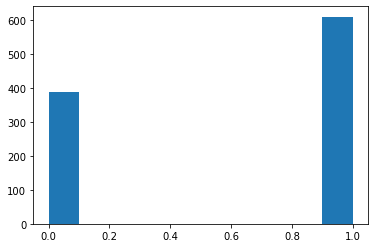

In [16]:
from scipy.stats import bernoulli

data_bern = bernoulli.rvs(size=1000, p=0.6)
_ = plt.hist(data_bern)


#### Binomial


The binomial distribution model deals with finding the probability of success of an event which has only two possible outcomes in a series of experiments. For example, tossing of a coin always gives a head or a tail. The probability of finding exactly 3 heads in tossing a coin repeatedly for 10 times is estimated during the binomial distribution.

In [17]:
from scipy.stats import binom 

# setting the values 
# of n and p 
n = 1000
p = 0.5

# obtaining the mean and variance  
mean, var = binom.stats(n, p) 

# printing mean and variance 
print("mean = "+str(mean)) 
print("variance = "+str(var))

mean = 500.0
variance = 250.0


In [18]:
# setting the values 
# of n and p 
n = 10
p = 0.5

# defining list of values 
values = list(range(n)) 

# list of pmf values 
dist = [binom.pmf(r, n, p) for r in values ]

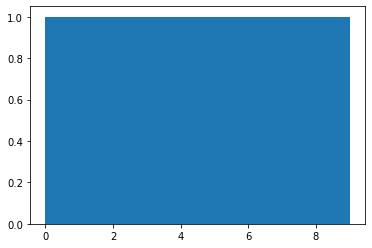

In [15]:
_ = plt.hist(values)

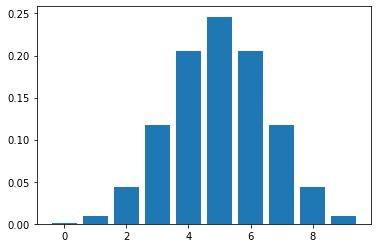

In [19]:
# plotting the graph  
_ = plt.bar(values, dist) # note use of bar graph, secong arg is height

### Continuous distributions

#### Uniform distribution


In [20]:
from scipy.stats import uniform

In [21]:
# random numbers from uniform distribution
n = 100000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc=start, scale=width)

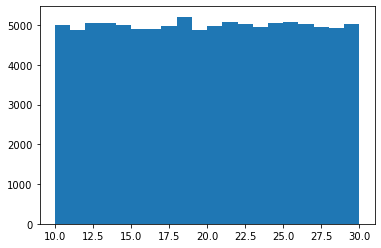

In [22]:
plt.hist(data_uniform, bins=20);

#### Normal (Gaussian) distriibution

In [23]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=100000, loc=0, scale=1)  # loc=mean, scale=std-dev

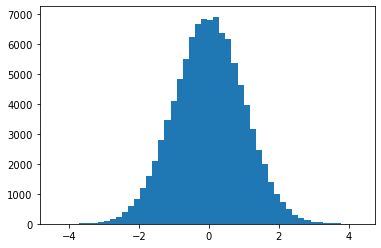

In [24]:
plt.hist(data_normal, bins=50);

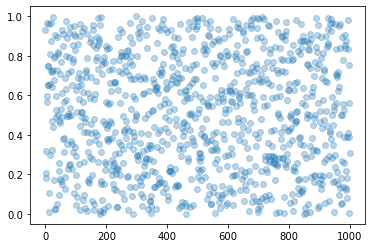

In [30]:
np.random.seed(12345) # This makes python repeat the same numbers every time we run the program.
# I can choose any number to go inside the brackets of "seed".

my_numbers = np.random.uniform(low=0, high=1, size=1000)

plt.plot(np.arange(0, len(my_numbers)), my_numbers, 'o', alpha=0.3);
# The alpha=0.3 modifier makes the symbols slightly transparent so that we can see the density of the data points better.

In science, we often want our numbers to be random, but not uniformly distributed. 

For example, measurement errors often follow a Gaussian or "normal" distribution. This means that we will very often measure something that is close to the mean value of all our measurements, and only rarely we will mess up our measurement so badly that we get a very extreme outlier.

So in the end we would like to get something that looks like this:

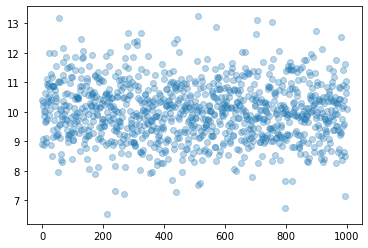

In [31]:
np.random.seed(9876)
gaussian_numbers = np.random.normal(loc=10, scale=1, size=1000)
# loc is where we want the mean of the numbers to be,
# and scale is a measure for how wide the numbers should scatter around that mean.

plt.plot(np.arange(0, len(gaussian_numbers)), gaussian_numbers, 'o', alpha=0.3)